# Multi Layer Perceptron Model 4 : **Anameia prediction Dataset**:

In [28]:
# Dataset from Kaggle
!kaggle datasets download -d humairmunir/anaemia-prediction

Dataset URL: https://www.kaggle.com/datasets/humairmunir/anaemia-prediction
License(s): apache-2.0
  0% 0.00/1.85k [00:00<?, ?B/s]
100% 1.85k/1.85k [00:00<00:00, 4.12MB/s]


In [29]:
# unzip the downloaded dataset
!unzip /content/anaemia-prediction.zip

Archive:  /content/anaemia-prediction.zip
  inflating: output.csv              


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8824 - loss: 0.5715 - val_accuracy: 0.9412 - val_loss: 0.4462
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.4124 - val_accuracy: 0.9412 - val_loss: 0.3478
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9365 - loss: 0.2910 - val_accuracy: 0.8824 - val_loss: 0.2976
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8480 - loss: 0.3373 - val_accuracy: 0.8824 - val_loss: 0.2627
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 0.2404 - val_accuracy: 0.8824 - val_loss: 0.2412
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9465 - loss: 0.1591 - val_accuracy: 0.8824 - val_loss: 0.2234
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9581 - loss: 0.1399 - val_accuracy: 0.8824 - val_loss: 0.2161
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.1563 - val_accuracy: 0.8824 - val_loss: 0.2083
Ep

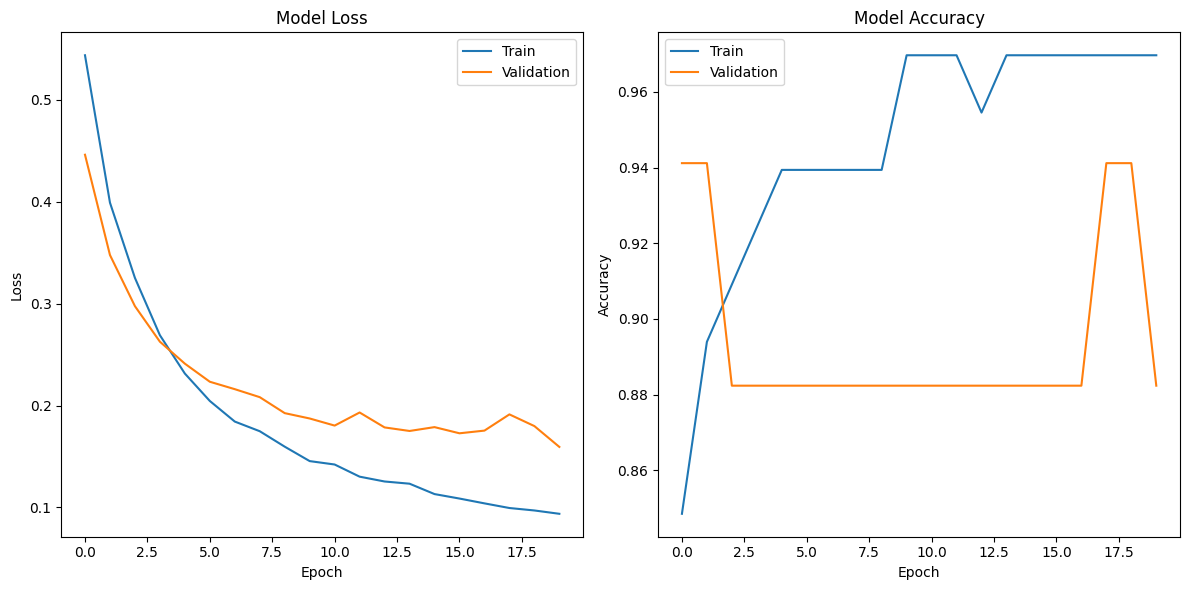

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Sample data
data = pd.read_csv('./output.csv')

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical columns to numeric
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Anaemic'] = label_encoder.fit_transform(df['Anaemic'])  # Yes: 1, No: 0

# Features and labels
X = df[['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']].values
y = df['Anaemic'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=2, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()
